# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
# 常見的 optimizer 包含
SGD  
RMSprop  
AdaGrad  
Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [ 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZER=['sgd','adagrad','rmsprop','adam']

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE :
    for optimizer in OPTIMIZER :
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = f"exp-lr-{lr}-optimizer-{optimizer}" 
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0907 22:25:02.448033 22412 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0907 22:25:02.450027 22412 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0907 22:25:02.464986 22412 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 22:25:02.465985 22412 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.4395 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 79us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 5s 97us/step - loss: 2.2831 - acc: 0.2139 - val_loss: 2.5354 - val_acc: 0.1466
Epoch 2/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8941 - acc: 0.3142 - val_loss: 1.8927 - val_acc: 0.3196
Epoch 3/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.7835 - acc: 0.3582 - val_loss: 1.8179 - val_acc: 0.3499
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7181 - acc: 0.3825 - val_loss: 1.7674 - val_acc: 0.3614
Epoch 5/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6585 - acc: 0.4058 - val_loss: 1.6508 - val_acc: 0.4079
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6193 - acc: 0.4208 - val_loss: 1.7861 - val_acc: 0.3779
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5793 - acc: 0.4367 - val_loss: 1.6115 - val_acc: 0.4279
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 5s 106us/step - loss: 1.7234 - acc: 0.3820 - val_loss: 1.7033 - val_acc: 0.3900
Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6278 - acc: 0.4186 - val_loss: 1.5831 - val_acc: 0.4401
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5643 - acc: 0.4396 - val_loss: 1.6027 - val_acc: 0.4335
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5208 - acc: 0.4564 - val_loss: 1.5793 - val_acc: 0.4363
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4865 - acc: 0.4679 - val_loss: 1.4775 - val_acc: 0.4784
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4439 - acc: 0.4846 - val_loss: 1.5063 - val_acc: 0.4631
Epoch 8/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4207 - acc: 0.4954 - val_loss: 1.4821 - val_acc: 0.4655
Epoch 9/50
50000/50000 [==========================

50000/50000 [==============================] - 4s 74us/step - loss: 1.8073 - acc: 0.3616 - val_loss: 1.7978 - val_acc: 0.3498
Epoch 4/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7641 - acc: 0.3766 - val_loss: 1.7442 - val_acc: 0.3833
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7239 - acc: 0.3910 - val_loss: 1.7452 - val_acc: 0.3861
Epoch 6/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6914 - acc: 0.4055 - val_loss: 1.7183 - val_acc: 0.3961
Epoch 7/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6730 - acc: 0.4122 - val_loss: 1.6432 - val_acc: 0.4176
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.6456 - acc: 0.4203 - val_loss: 1.6499 - val_acc: 0.4098
Epoch 9/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6234 - acc: 0.4288 - val_loss: 1.6657 - val_acc: 0.4172
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 88us/step - loss: 14.4804 - acc: 0.1010 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 90us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5027 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==========

50000/50000 [==============================] - 4s 85us/step - loss: 1.7180 - acc: 0.3828 - val_loss: 1.7150 - val_acc: 0.3716
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.6628 - acc: 0.4050 - val_loss: 1.8505 - val_acc: 0.3254
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6166 - acc: 0.4200 - val_loss: 1.7875 - val_acc: 0.3739
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5791 - acc: 0.4386 - val_loss: 1.7839 - val_acc: 0.3669
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5384 - acc: 0.4489 - val_loss: 1.6514 - val_acc: 0.3974
Epoch 9/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5042 - acc: 0.4619 - val_loss: 1.5990 - val_acc: 0.4273
Epoch 10/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.4812 - acc: 0.4700 - val_loss: 1.5499 - val_acc: 0.4515
Epoch 11/50
50000/50000 [========================

50000/50000 [==============================] - 5s 99us/step - loss: 1.5092 - acc: 0.4631 - val_loss: 1.5063 - val_acc: 0.4676
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4711 - acc: 0.4761 - val_loss: 1.4962 - val_acc: 0.4688
Epoch 7/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.4371 - acc: 0.4889 - val_loss: 1.4651 - val_acc: 0.4786
Epoch 8/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4176 - acc: 0.4957 - val_loss: 1.4739 - val_acc: 0.4705
Epoch 9/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.3830 - acc: 0.5051 - val_loss: 1.4144 - val_acc: 0.5004
Epoch 10/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3614 - acc: 0.5174 - val_loss: 1.4055 - val_acc: 0.5043
Epoch 11/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3304 - acc: 0.5260 - val_loss: 1.4017 - val_acc: 0.5006
Epoch 12/50
50000/50000 [===================

50000/50000 [==============================] - 4s 80us/step - loss: 1.6976 - acc: 0.4052 - val_loss: 1.7757 - val_acc: 0.3666
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6729 - acc: 0.4116 - val_loss: 1.7035 - val_acc: 0.4052
Epoch 8/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6473 - acc: 0.4223 - val_loss: 1.6694 - val_acc: 0.4114
Epoch 9/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6240 - acc: 0.4272 - val_loss: 1.7341 - val_acc: 0.3852
Epoch 10/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6080 - acc: 0.4342 - val_loss: 1.6593 - val_acc: 0.4185
Epoch 11/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5867 - acc: 0.4425 - val_loss: 1.6092 - val_acc: 0.4267
Epoch 12/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5707 - acc: 0.4467 - val_loss: 1.5934 - val_acc: 0.4353
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 4s 87us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 4s 90us/step - loss: 14.5065 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 5s 104us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 4s 88us/step - loss: 14.5024 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [=======

Epoch 8/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5391 - acc: 0.4500 - val_loss: 1.5350 - val_acc: 0.4465
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5081 - acc: 0.4628 - val_loss: 1.6873 - val_acc: 0.4081
Epoch 10/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.4826 - acc: 0.4691 - val_loss: 1.4872 - val_acc: 0.4665
Epoch 11/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.4444 - acc: 0.4840 - val_loss: 1.5927 - val_acc: 0.4433
Epoch 12/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4213 - acc: 0.4900 - val_loss: 1.5648 - val_acc: 0.4386
Epoch 13/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3941 - acc: 0.5023 - val_loss: 1.6730 - val_acc: 0.4050
Epoch 14/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3708 - acc: 0.5103 - val_loss: 1.6075 - val_acc: 0.4438
Epoch 15/50
50000/50000 [=========

50000/50000 [==============================] - 5s 94us/step - loss: 1.3908 - acc: 0.5048 - val_loss: 1.4297 - val_acc: 0.4936
Epoch 10/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.3550 - acc: 0.5178 - val_loss: 1.4514 - val_acc: 0.4914
Epoch 11/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.3372 - acc: 0.5248 - val_loss: 1.4345 - val_acc: 0.4917
Epoch 12/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.3065 - acc: 0.5344 - val_loss: 1.4494 - val_acc: 0.4874
Epoch 13/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.2916 - acc: 0.5389 - val_loss: 1.3863 - val_acc: 0.5138
Epoch 14/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.2696 - acc: 0.5489 - val_loss: 1.3769 - val_acc: 0.5153
Epoch 15/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.2390 - acc: 0.5575 - val_loss: 1.3959 - val_acc: 0.5152
Epoch 16/50
50000/50000 [=====================

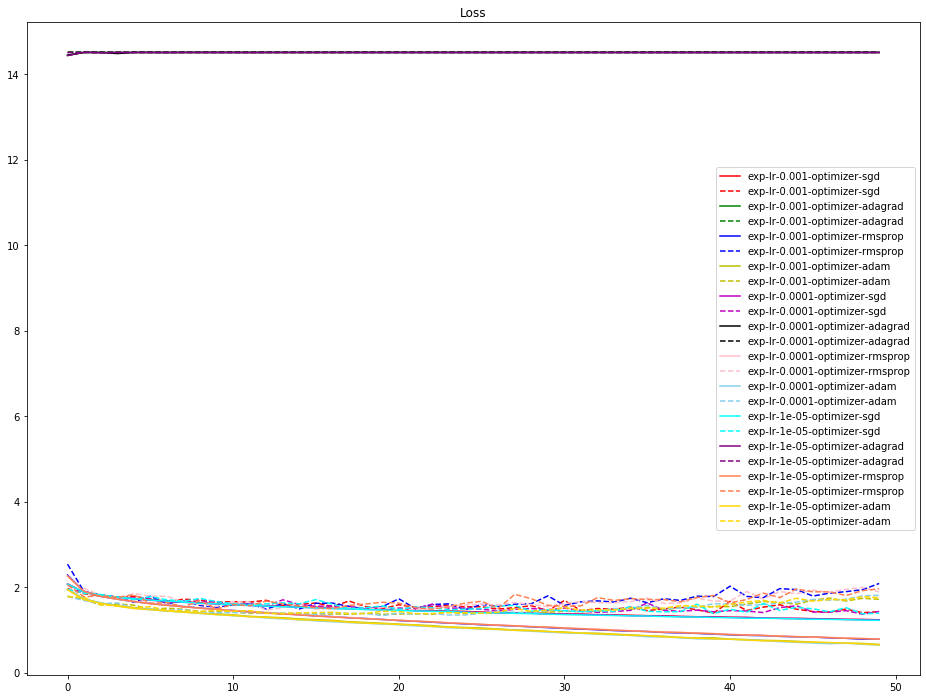

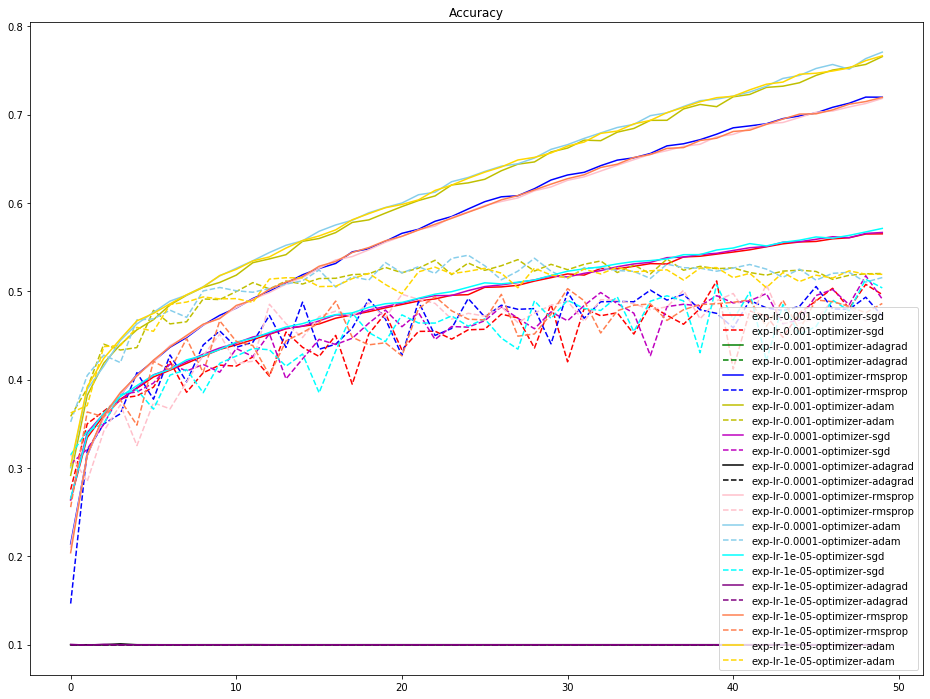

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","pink","skyblue","aqua","purple","coral",'gold']

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.savefig('foo.png')
plt.show()